<a href="https://colab.research.google.com/github/lydia-r/Data-projects/blob/main/Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lydia Akalu**

**Data 201**

**Project 2**

our dataset focuses on used Ford vehicle listings, including information such as model, year, mileage, fuel type, transmission, engine size, and price. The data comes from a publicly available CSV containing real Ford car listings collected from online automobile marketplaces. We then prepared the dataset for analysis by selecting relevant variables and cleaning missing values, resulting in the dataframe shown below. This preprocessing step allows us to compare how different car characteristics relate to pricing. The code used to load and prepare the dataset can be found above

In [36]:
# prepare and wrangle data using pandas and numpy

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset

df = pd.read_csv("/content/ford.csv")
df = df[df['year'] <= 2025]

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


**Variables defined**

These are the metrics we chose to analyze, and their definitions

**model:** The specific Ford model of the car (e.g., Fiesta, Focus).

**year:** The year the car was manufactured or registered.

**price:** The selling price of the car in the dataset’s currency (target variable).

**transmission:** The type of gearbox the car uses (Manual, Automatic, Semi-Auto).

**mileage:** The total number of miles the car has been driven (odometer reading).

**fuelType:** The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric).

**tax:** The annual vehicle tax cost based on emissions and regulations.

**mpg** :Miles per gallon — the fuel efficiency of the car.

**engineSize**: The size of the engine in liters (e.g., 1.0, 1.5, 2.0).

# **EDA & Visualizations**

In [37]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [17]:
df.shape

(17966, 9)

In [38]:
df.dtypes

,0
model,object
year,int64
price,int64
transmission,object
mileage,int64
fuelType,object
tax,int64
mpg,float64
engineSize,float64


In [39]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Our target variable is Price

All Other Columns can be used as Predictor Variables

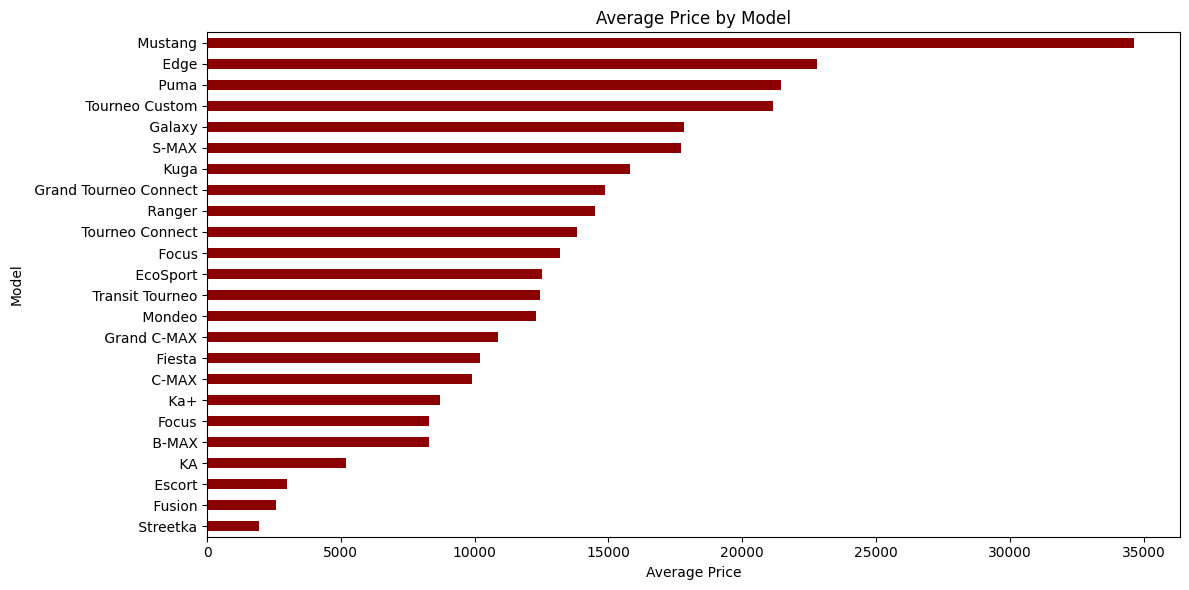

In [52]:
avg_price_model = df.groupby('model')['price'].mean().sort_values()

# Horizontal bar plot
plt.figure(figsize=(12,6))
avg_price_model.plot(kind='barh', color='darkred')
plt.title('Average Price by Model')
plt.xlabel('Average Price')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


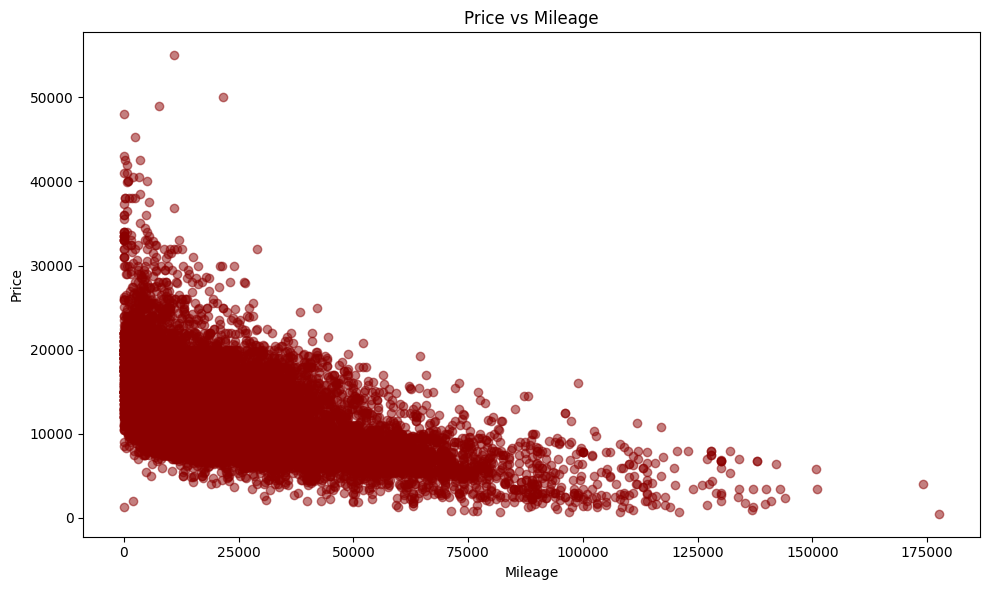

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df['mileage'], df['price'], alpha=0.5, color='darkred')
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

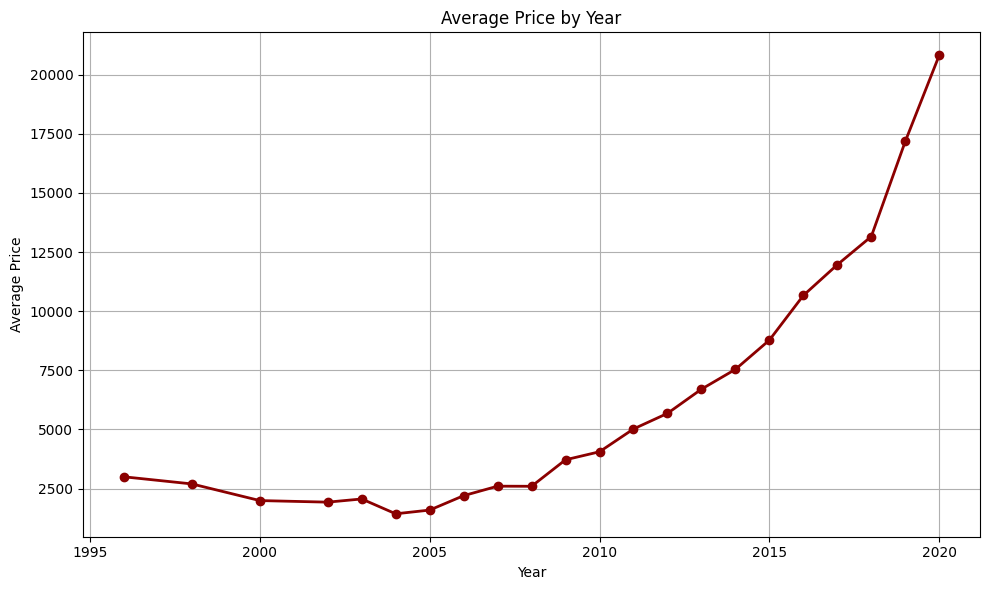

In [53]:
avg_year = df.groupby('year')['price'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_year.index, avg_year.values, marker='o', linewidth=2, color='darkred')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1361504242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='price', palette='Set2')


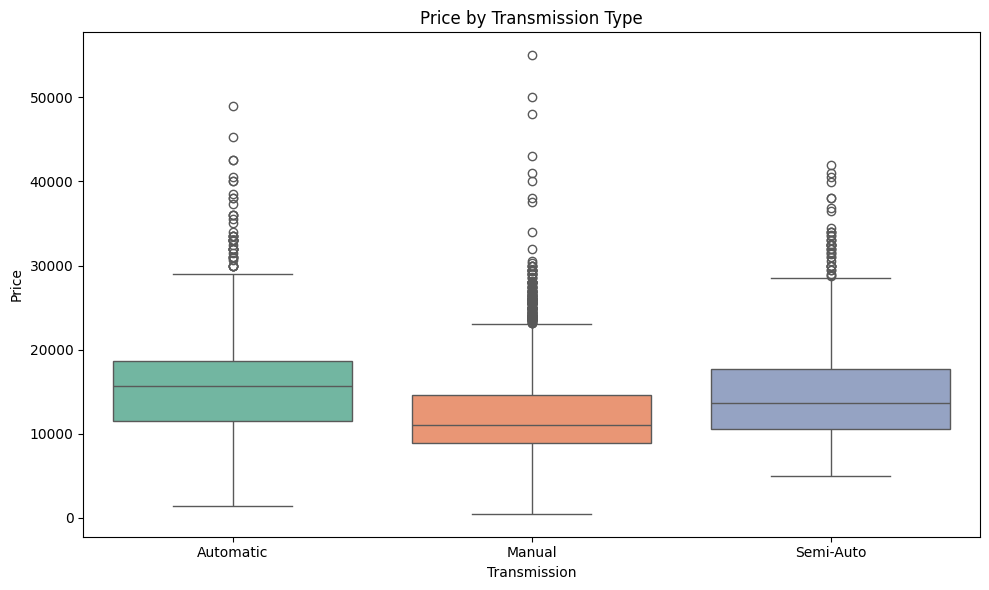

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='transmission', y='price', palette='Set2')
plt.title('Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# **Linear Regression**  

Target (y): price

Predictors (X): year, mileage, tax, mpg, engineSize

In [44]:
import sklearn as sk



# Pick desired X columns (numeric only for now)
xcols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
ycol = ['price']

# Drop NA values
df_ml = df[xcols + ycol].dropna()

# Subset the response and predictor variables
X = df_ml[xcols]
y = df_ml[ycol]

# Split the model into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Check split data size
print("Shape of training and testing data: ",
      X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared on test data: ", r2)
print("RMSE on test data: ", rmse)

Shape of training and testing data:  (12575, 5) (5390, 5) (12575, 1) (5390, 1)
R-squared on test data:  0.7240943608629059
RMSE on test data:  2504.0496797159376


In [45]:
# fit the training data to a linear model
LinReg = sk.linear_model.LinearRegression().fit(X_train, y_train)

# use the model to predict test data
y_predicted = LinReg.predict(X_test)

# measure accuracy of the model using MSE
print("\nMSE of testing data: ", sk.metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted))
print("MSE of training data: ", sk.metrics.mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

# get the R^2 score
r2 = LinReg.score(X_test, y_test)
print("\nR^2: ", r2)

# interpret
print(f"The predictor variables in this model (year, mileage, tax, mpg, and engine size) "
      f"can explain about {np.round(r2*100, 2)}% of the variability in the price of Ford cars.")


MSE of testing data:  6270264.7984854905
MSE of training data:  5807703.730923696

R^2:  0.7240943608629059
The predictor variables in this model (year, mileage, tax, mpg, and engine size) can explain about 72.41% of the variability in the price of Ford cars.


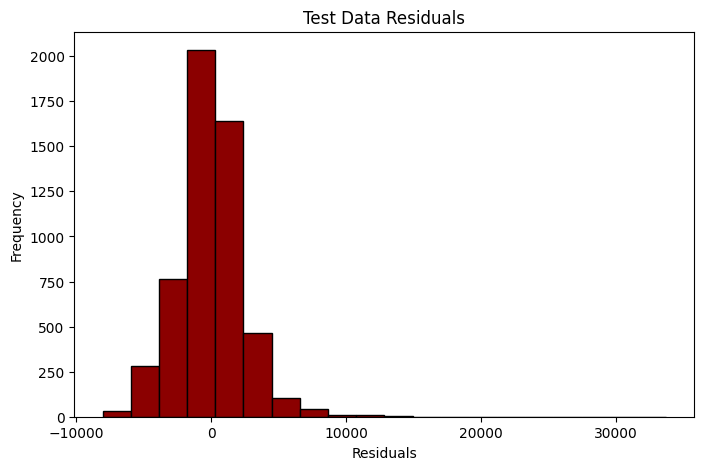

In [56]:
# Plot a histogram of the residuals and check if they have a Gaussian distribution
import matplotlib.pyplot as plt

residuals = y_test - y_predicted

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=20, edgecolor='black', color='darkred')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Test Data Residuals")
plt.show()

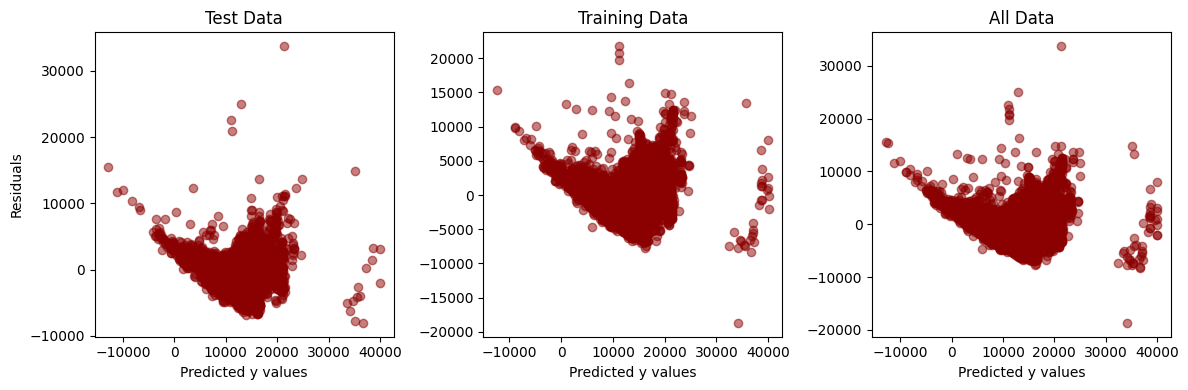

In [55]:
# scatterplot of predicted values and residuals to check assumption of homoscedasticity
plt.figure(figsize = [12.0, 4.0])

# Test data residuals
plt.subplot(1,3,1)
plt.scatter(y_predicted, y_test - y_predicted, alpha = 0.5, color='darkred')
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")
plt.title("Test Data")

# Training data residuals
plt.subplot(1,3,2)
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train), alpha = 0.5, color='darkred')
plt.xlabel("Predicted y values")
plt.title("Training Data")

# All data residuals
plt.subplot(1,3,3)
plt.scatter(LinReg.predict(X), y - LinReg.predict(X), alpha = 0.5, color='darkred')
plt.xlabel("Predicted y values")
plt.title("All Data")

plt.tight_layout()
plt.show()

At lower predicted prices, the residuals are tightly clustered.

As predicted price increases, the residuals become much more spread out — both above and below zero.

This widening pattern violates the assumption of homoscedasticity required for linear regression.

Overall:

The model does not meet the homoscedasticity assumption, since the residuals exhibit non-constant variance. This suggests that a simple linear regression may not fully capture the relationship between predictors and car price, especially for higher-priced vehicles.

In [48]:
# Get the coefficients of the linear regression
for i in xcols:
    print(f"{i}: {LinReg.coef_[0][xcols.index(i)]}")

print(f"\nIntercept: {LinReg.intercept_}\n")

# interpret the coefficients
print(f"\nFor every additional 1 unit increase in car age (year), the model predicts a change in price of ${np.round(LinReg.coef_[0][0], 4)}.")
print(f"\nFor every additional mile driven, the car's predicted price decreases by ${np.round(LinReg.coef_[0][1], 4)}.")
print(f"\nFor every 1-unit increase in tax, the predicted car price changes by ${np.round(LinReg.coef_[0][2], 4)}.")
print(f"\nFor every additional 1 mpg in fuel efficiency, the predicted price changes by ${np.round(LinReg.coef_[0][3], 4)}.")
print(f"\nFor every 1.0 increase in engine size (liters), the predicted car price changes by ${np.round(LinReg.coef_[0][4], 4)}.")

print("\nThe intercept represents the predicted price when all predictors are zero, which does not make practical sense to interpret for this dataset.")

year: 1327.2182594092312
mileage: -0.05049111974316453
tax: -0.33837182485115713
mpg: -86.74037805474985
engineSize: 5309.685218077364

Intercept: [-2665459.76642657]


For every additional 1 unit increase in car age (year), the model predicts a change in price of $1327.2183.

For every additional mile driven, the car's predicted price decreases by $-0.0505.

For every 1-unit increase in tax, the predicted car price changes by $-0.3384.

For every additional 1 mpg in fuel efficiency, the predicted price changes by $-86.7404.

For every 1.0 increase in engine size (liters), the predicted car price changes by $5309.6852.

The intercept represents the predicted price when all predictors are zero, which does not make practical sense to interpret for this dataset.


The intercept is meaningless because it represents the predicted car price when all predictor variables (year, mileage, tax, mpg, and engineSize) are equal to zero, which is not realistic for any car. Since these values cannot occur in real life, the intercept has no practical interpretation and is only a mathematical component of the regression line.